# **Importing Libraries**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Working with Dataset**

In [12]:
pd.set_option('display.max_column', None)
burnoutDf=pd.read_csv("burnoutPredData.csv")
burnoutDf
uiuo

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52


In [13]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [14]:
burnoutDf["Date of Joining"]= pd.to_datetime(burnoutDf["Date of Joining"])

In [15]:
burnoutDf.shape

(22750, 9)

In [16]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [17]:
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [18]:
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [19]:
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [20]:
burnoutDf.duplicated().sum()

0

In [51]:
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLable
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,0.476571,0.652000,0.540220
std,1.135145,1.984099,1.829281,0.193267,0.499462,0.476346,0.498391
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.700000,0.320000,0.000000,0.000000,0.000000
50%,2.000000,4.481398,5.728188,0.452005,0.000000,1.000000,1.000000
75%,3.000000,6.000000,6.900000,0.580000,1.000000,1.000000,1.000000
max,5.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
for i, col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [23]:
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [24]:
intFloatburnoutDf =burnoutDf.select_dtypes([np.int, np.float])
for i, col in enumerate(intFloatburnoutDf.columns):
  if (intFloatburnoutDf[col].skew() > 0.1):
    print("\n",col, "Feature is Positively skewed and value is: ", intFloatburnoutDf[col].skew())
  elif(intFloatburnoutDf[col].skew() <= -0.1):
    print("\n",col, "feature is negtively skewed and value is: ", intFloatburnoutDf[col].skew())
  else:
    print("\n",col, "feature is normally Distributed and value is: ", intFloatburnoutDf[col].skew())


 Designation feature is normally Distributed and value is:  0.09242138478903683

 Resource Allocation Feature is Positively skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is negtively skewed and value is:  -0.4308950578815428

 Burn Rate feature is normally Distributed and value is:  0.045737370909640515


In [25]:
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(), inplace=True)
burnoutDf[ 'Mental Fatigue Score'].fillna(burnoutDf["Mental Fatigue Score"].mean(), inplace=True)
burnoutDf[ 'Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(), inplace=True)

In [26]:
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [27]:
burnoutDf.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


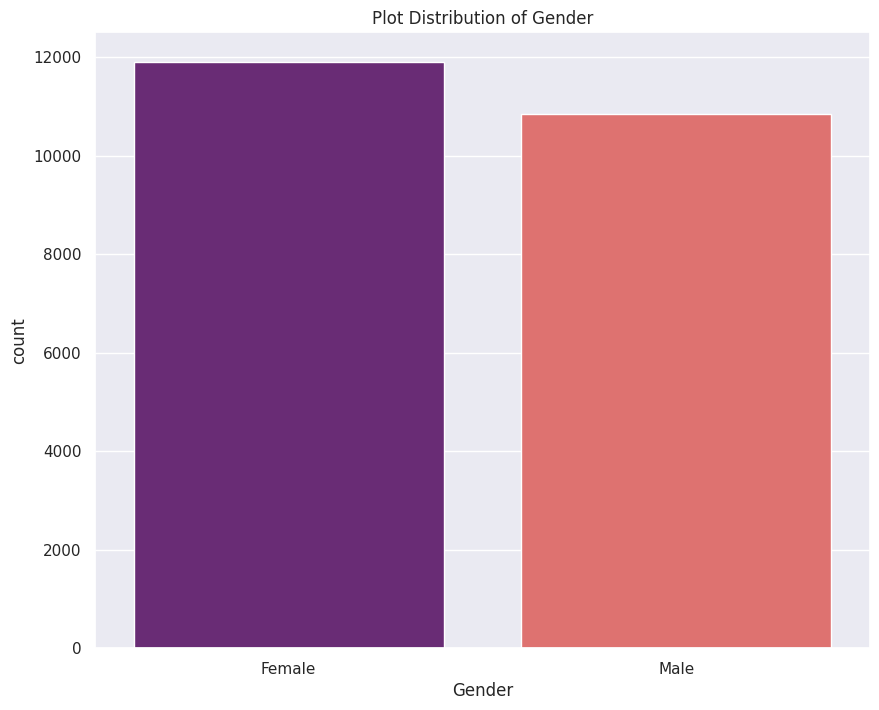

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data=burnoutDf,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

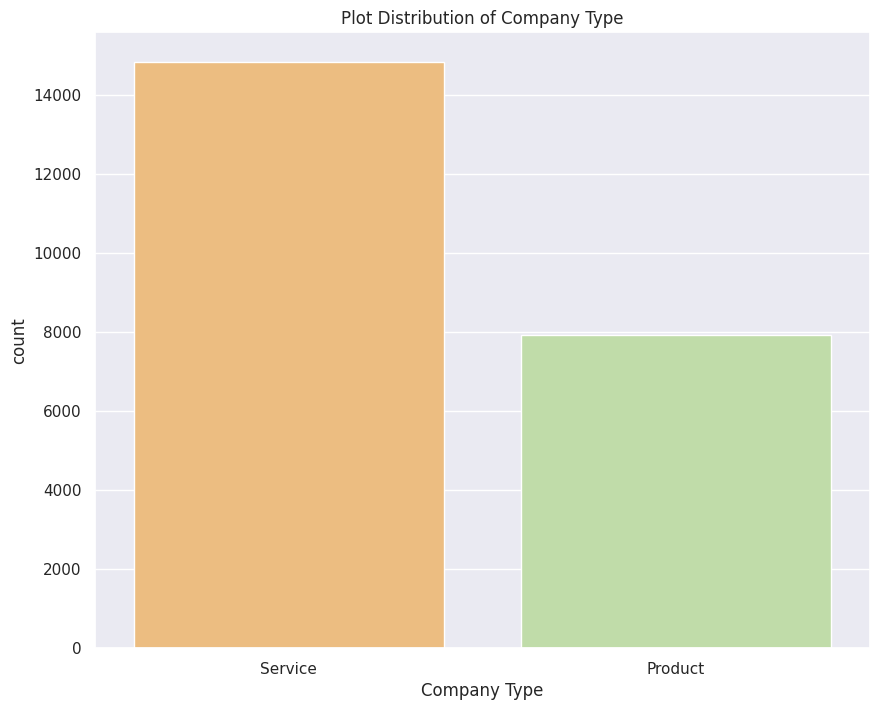

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data=burnoutDf,palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

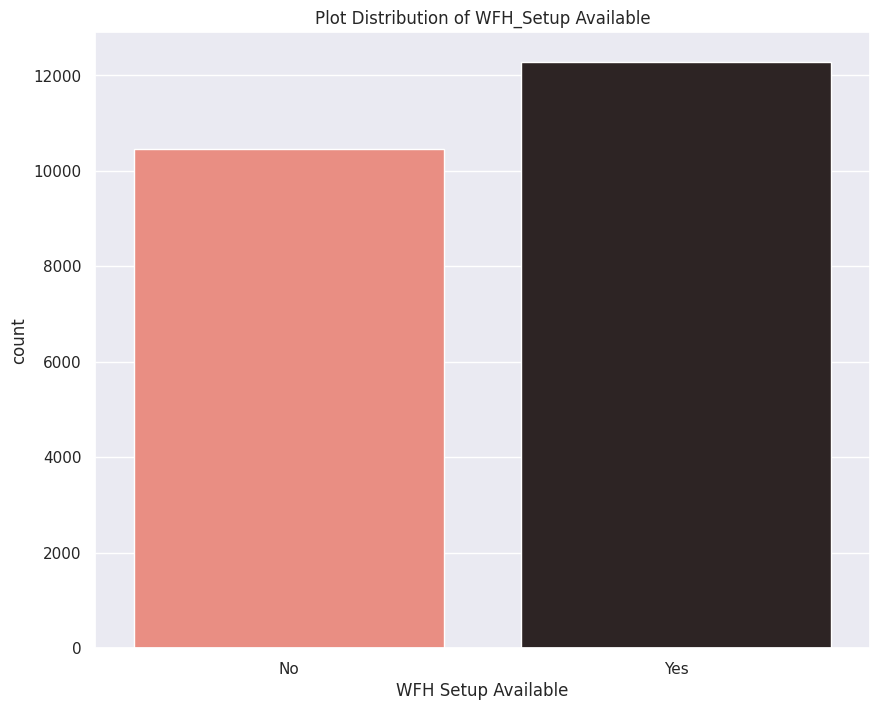

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=burnoutDf,palette="dark:salmon_r")
plt.title("Plot Distribution of WFH_Setup Available")
plt.show()

# Label Encoding

In [37]:
from sklearn import preprocessing
Label_encode= preprocessing.LabelEncoder()

In [38]:
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf["Gender"].values)
burnoutDf['Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf["Company Type"].values)
burnoutDf['WFH_Setup_AvailableLable'] = Label_encode.fit_transform(burnoutDf["WFH Setup Available"].values)

In [39]:
gn=burnoutDf.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [40]:
gn=burnoutDf.groupby('Company Type')
gn=gn['Company_TypeLabel']
gn.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [41]:
gn=burnoutDf.groupby('WFH Setup Available')
gn=gn['WFH_Setup_AvailableLable']
gn.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLable, dtype: int64

In [42]:
burnoutDf.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLable
22740,2008-09-05,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0
22741,2008-01-07,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.410000,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.590000,0,0,1
22747,2008-11-05,Male,Service,Yes,3,7.0,5.728188,0.720000,1,1,1
22748,2008-01-10,Female,Service,No,2,5.0,5.900000,0.520000,0,1,0
22749,2008-01-06,Male,Product,No,3,6.0,7.800000,0.610000,1,0,0


# Feature Selection

In [43]:
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score',
         'GenderLabel','Company_TypeLabel','WFH_Setup_AvailableLable']
x=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [44]:
print(x)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company_TypeLabel  WFH_Setup_AvailableLable  
0         

In [45]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


# Implementing PCA

In [46]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
print("PCA shape of x is: ",x_pca.shape," and orignal shape is:", x.shape)
print(" % importance of selected features is:", pca.explained_variance_ratio_)
print("the number of features selected through PCA is:", pca.n_components)

PCA shape of x is:  (22750, 4)  and orignal shape is: (22750, 6)
 % importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
the number of features selected through PCA is: 0.95


# Data Splitting

In [47]:
from sklearn.model_selection import train_test_split

x_train_pca,x_test,y_train,y_test=train_test_split(x_pca,y, test_size=0.25, random_state=10)

# print the shape of splitted data
print(x_train_pca.shape, x_test.shape, y_train.shape, y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


# Model Implementation

### Random Forest Regressor

In [48]:
from sklearn.metrics import r2_score
#Rundon Forest repressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train_pca,y_train)

train_pred_rf=rf_model.predict(x_train_pca)
train_r2=r2_score(y_train, train_pred_rf)
test_pred_rf=rf_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred_rf)

# Accuracy score

print("Accuracy score of train data: "+str(round(100*train_r2, 4))+"%")
print("Accuracy store of test data: "+str(round(100*test_r2, 4))+"%")

Accuracy score of train data: 91.1967%
Accuracy store of test data: 83.9099%


### AdaBoost Regressor

In [49]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ad_model = AdaBoostRegressor()
ad_model.fit(x_train_pca,y_train)

train_pred_ad=ad_model.predict(x_train_pca)
train_r2=r2_score(y_train, train_pred_ad)
test_pred_ad=ad_model.predict(x_test)
test_r2 = r2_score(y_test, test_pred_ad)

# Accuracy score

print("Accuracy score of train data: "+str(round(100*train_r2, 4))+"%")
print("Accuracy store of test data: "+str(round(100*test_r2, 4))+"%")

Accuracy score of train data: 76.6712%
Accuracy store of test data: 76.2204%


In [ ]:
#https://www.kaggle.com/code/gcdatkin/employee-burnout-prediction